In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import dateutil.parser as parser

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt 
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


In [16]:
data=pd.read_csv('../input/onlineretail/OnlineRetail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


1) **Find mean, std dev, min , max of unitprice field.**

In [17]:
mean1 = data['UnitPrice'].mean()
print ('UnitPrice Mean: ' + str(mean1))
std1 = data['UnitPrice'].std() 
print ('Std of UnitPrice: ' + str(std1))
max1 = data['UnitPrice'].max()
print ('Max UnitPrice: ' + str(max1))
min1 = data['UnitPrice'].min()
print ('Min UnitPrice: ' + str(min1))

UnitPrice Mean: 4.611113626088513
Std of UnitPrice: 96.75985306117938
Max UnitPrice: 38970.0
Min UnitPrice: -11062.06


2)**Draw histogram of unitprice field using matplotlib**

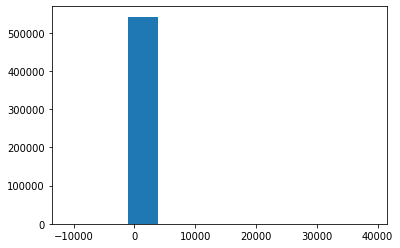

In [18]:

plt.hist(data['UnitPrice'])

plt.show()

3)**Find mean of unitprice group by country and plot them**


<AxesSubplot:xlabel='Country'>

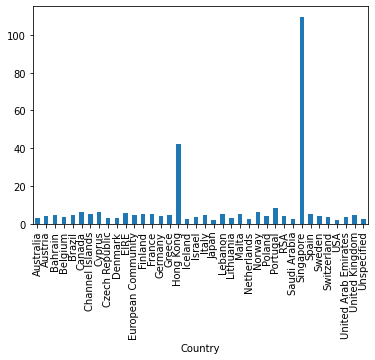

In [19]:
data.groupby('Country')['UnitPrice'].mean().plot(kind = 'bar')

4)**Find min and max of unit price group by customerID**


In [20]:
#Find min and max of unit price group by customerID
group_data=data.groupby('CustomerID')
res_data=group_data.mean();
temp_data=res_data.reset_index()
temp_data


,CustomerID,Quantity,UnitPrice
0,12346.0,0.000000,1.040000
1,12347.0,13.505495,2.644011
2,12348.0,75.516129,5.764839
3,12349.0,8.643836,8.289041
4,12350.0,11.588235,3.841176
...,...,...,...
4367,18280.0,4.500000,4.765000
4368,18281.0,7.714286,5.622857
4369,18282.0,7.538462,4.821538
4370,18283.0,1.847884,1.614987


4)b

In [21]:
print("Minimum of UnitPrice:",temp_data['UnitPrice'].min())
print("Maximum of UnitPrice:",temp_data['UnitPrice'].max())

Minimum of UnitPrice: 0.0
Maximum of UnitPrice: 8055.779999999999


5) ** Find cumulative sales monthly and yearly and plot them**

In [22]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M')


In [23]:
data['InvoiceDate'].min()


Timestamp('2010-12-01 08:26:00')

In [24]:

TotalAmount = data['Quantity'] * data['UnitPrice']
data.insert(loc=6,column = 'TotalPrice', value=TotalAmount)

In [25]:
data.head()
new_data = data.copy()

In [26]:

new_data['Year'] = pd.DatetimeIndex(new_data['InvoiceDate']).year
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010


In [27]:
new_df.groupby('Year')['TotalPrice'].sum().plot(kind='bar',title="Year wise sale",xlabel="Year",ylabel="Sales(in 10^6)")


NameError: name 'new_df' is not defined

In [ ]:
new_df['Mon'] = pd.DatetimeIndex(new_df['InvoiceDate']).month
new_df['month'] = pd.DatetimeIndex(new_df['InvoiceDate']).month_name
new_df.groupby(['Mon'])['TotalPrice'].sum().plot(kind='bar', title = 'Month Wise Sale',xlabel="Month",ylabel="Sale(in 10^6)")